# Define five features

In [3]:
from feature_extractor import FeatureExtractor
from gridworld import GridWorld
# Define the blocked state position as a tuple
blocked_state = (1, 1)

from feature_extractor import FeatureExtractor
from gridworld import GridWorld

class GridWorldFeatureExtractor5(FeatureExtractor):

    def __init__(self, mdp, blocked_state):
        self.mdp = mdp
        self.blocked_state = blocked_state  # Tuple representing the blocked state position

    def num_features(self):
        # Include an additional binary feature for each action
        return 5

    def num_actions(self):
        return len(self.mdp.get_actions())

    def is_forbidden_state(self, state):
        # Check if the state is the blocked state
        return state == self.blocked_state

    def extract(self, state, action):
        goal = (self.mdp.width - 1, self.mdp.height - 1)
        x = 0
        y = 1
        e = 0.01
        feature_values = []

        for a in self.mdp.get_actions():
            if a == action and state != GridWorld.TERMINAL:
                #Distance-based features
                feature_x = 1.0 - (abs(state[x] - goal[x]) / (goal[x]+e))
                feature_x = max(feature_x, 0.0)
                feature_values += [feature_x]
                
                # Calculate a feature that increases as 'y' approaches the goal
                feature_y = 1.0 - (abs(state[y] - goal[y]) / (goal[y]+e))
                feature_y = max(feature_y, 0.0)
                feature_values += [feature_y]
                
                # Feature indicating if the current state is close to the forbidden state
                distance_to_blocked_state = abs(state[x] - self.blocked_state[0]) + abs(state[y] - self.blocked_state[1])
                proximity_feature = distance_to_blocked_state / (self.mdp.width + self.mdp.height)
                feature_values += [proximity_feature]
                             
              
                feature_values +=[1 if state[x] <= self.mdp.width-1 and state[y]==0 and action !="DOWN" else 0]
                
                # Check whether resulting state is valid
                action_mapping = {
                    '▲': (0, 1),
                    '▼': (0, -1),
                    '◄': (-1, 0),
                    '►': (1, 0),
                    'terminate': (3, 2)
                }
                new_state = (state[0] + action_mapping[a][0], state[1] + action_mapping[a][1])
                is_valid = (new_state not in self.mdp.blocked_states) and (new_state in self.mdp.get_states()) and (new_state !=list(self.mdp.get_goal_states().keys())[1])
                feature_values += [1 if is_valid else 0]
            else:
                for _ in range(0, self.num_features()):
                    feature_values += [0.0]
        return feature_values

# Define seven features

In [4]:
from feature_extractor import FeatureExtractor
from gridworld import GridWorld
# Define the blocked state position as a tuple
blocked_state = (1, 1)

from feature_extractor import FeatureExtractor
from gridworld import GridWorld

class GridWorldFeatureExtractor7(FeatureExtractor):

    def __init__(self, mdp, blocked_state):
        self.mdp = mdp
        self.blocked_state = blocked_state  # Tuple representing the blocked state position

    def num_features(self):
        # Include an additional binary feature for each action
        return 7

    def num_actions(self):
        return len(self.mdp.get_actions())

    def is_forbidden_state(self, state):
        # Check if the state is the blocked state
        return state == self.blocked_state

    def extract(self, state, action):
        goal = (self.mdp.width - 1, self.mdp.height - 1)
        x = 0
        y = 1
        e = 0.01
        feature_values = []

        for a in self.mdp.get_actions():
            if a == action and state != GridWorld.TERMINAL:
                #Distance-based features
                feature_x = 1.0 - (abs(state[x] - goal[x]) / (goal[x]+e))
                feature_x = max(feature_x, 0.0)
                feature_values += [feature_x]
                
                # Calculate a feature that increases as 'y' approaches the goal
                feature_y = 1.0 - (abs(state[y] - goal[y]) / (goal[y]+e))
                feature_y = max(feature_y, 0.0)
                feature_values += [feature_y]
                
                # Feature indicating if the current state is close to the forbidden state
                distance_to_blocked_state = abs(state[x] - self.blocked_state[0]) + abs(state[y] - self.blocked_state[1])
                proximity_feature = distance_to_blocked_state / (self.mdp.width + self.mdp.height)
                feature_values += [proximity_feature]


                # Feature indicating if the current state is close to the forbidden state
                feature_values +=[1 if state[x] == self.blocked_state[0] and action not in ["UP","DOWN"] else 0 ]
                feature_values +=[1 if state[y] == self.blocked_state[1]  and action not in ["RIGHT" ,"LEFT"] else 0 ]                             
                feature_values +=[1 if state[x] <= self.mdp.width-1 and state[y]==0 and action !="DOWN" else 0]
                
                # Check whether resulting state is valid
                action_mapping = {
                    '▲': (0, 1),
                    '▼': (0, -1),
                    '◄': (-1, 0),
                    '►': (1, 0),
                    'terminate': (3, 2)
                }
                new_state = (state[0] + action_mapping[a][0], state[1] + action_mapping[a][1])
                is_valid = (new_state not in self.mdp.blocked_states) and (new_state in self.mdp.get_states()) and (new_state !=list(self.mdp.get_goal_states().keys())[1])
                feature_values += [1 if is_valid else 0]
            else:
                for _ in range(0, self.num_features()):
                    feature_values += [0.0]
        return feature_values

In [5]:
import numpy as np

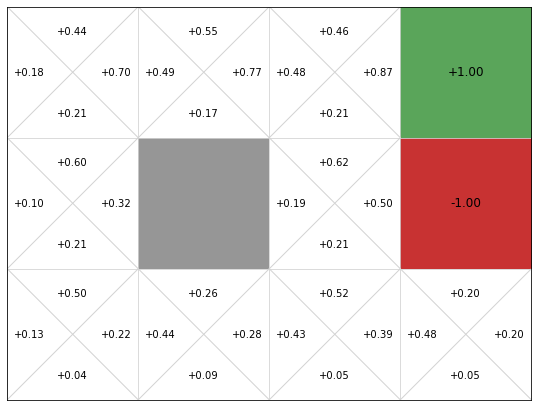

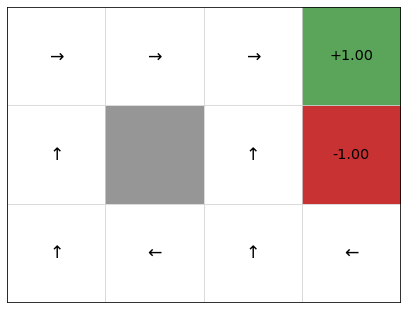

In [6]:
import random
from gridworld import GridWorld
from qlearning import QLearning
from linear_qfunction import LinearQFunction
from epsilon_greedy import EpsilonGreedy
mdp = GridWorld()
features = GridWorldFeatureExtractor7(mdp,blocked_state)
qfunction = LinearQFunction(features)
QLearning(mdp, EpsilonGreedy(), qfunction).execute()
policy = qfunction.extract_policy(mdp)
mdp.visualise_q_function(qfunction)
mdp.visualise_policy(policy)

In [7]:
import numpy as np

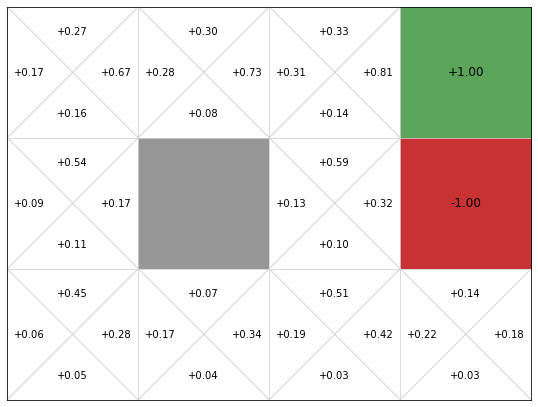

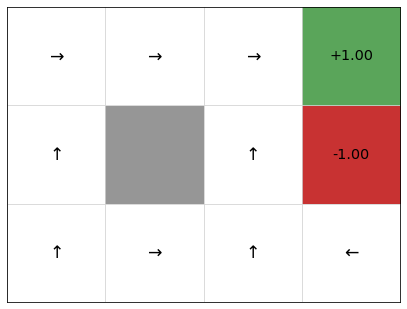

In [8]:
import random
np.random.seed(116)
from gridworld import GridWorld
from qlearning import QLearning
from linear_qfunction import LinearQFunction
from epsilon_greedy import EpsilonGreedy
mdp = GridWorld()
features = GridWorldFeatureExtractor5(mdp,blocked_state)
qfunction = LinearQFunction(features)
QLearning(mdp, EpsilonGreedy(), qfunction).execute()
policy = qfunction.extract_policy(mdp)
mdp.visualise_q_function(qfunction)
mdp.visualise_policy(policy)

# Define eight features

In [9]:
from feature_extractor import FeatureExtractor
from gridworld import GridWorld
# Define the blocked state position as a tuple
blocked_state = (1, 1)

from feature_extractor import FeatureExtractor
from gridworld import GridWorld

class GridWorldFeatureExtractor8(FeatureExtractor):

    def __init__(self, mdp, blocked_state):
        self.mdp = mdp
        self.blocked_state = blocked_state  # Tuple representing the blocked state position

    def num_features(self):
        # Include an additional binary feature for each action
        return 8

    def num_actions(self):
        return len(self.mdp.get_actions())

    def is_forbidden_state(self, state):
        # Check if the state is the blocked state
        return state == self.blocked_state

    def extract(self, state, action):
        goal = (self.mdp.width - 1, self.mdp.height - 1)
        x = 0
        y = 1
        e = 0.01
        feature_values = []

        for a in self.mdp.get_actions():
            if a == action and state != GridWorld.TERMINAL:
                #Distance-based features
                feature_x = 1.0 - (abs(state[x] - goal[x]) / (goal[x]+e))
                feature_x = max(feature_x, 0.0)
                feature_values += [feature_x]
                
                # Calculate a feature that increases as 'y' approaches the goal
                feature_y = 1.0 - (abs(state[y] - goal[y]) / (goal[y]+e))
                feature_y = max(feature_y, 0.0)
                feature_values += [feature_y]
                
                # Feature indicating if the current state is close to the forbidden state
                distance_to_blocked_state = abs(state[x] - self.blocked_state[0]) + abs(state[y] - self.blocked_state[1])
                proximity_feature = distance_to_blocked_state / (self.mdp.width + self.mdp.height)
                feature_values += [proximity_feature]


                # Feature indicating if the current state is close to the forbidden state
                feature_values +=[1 if state[x] == self.blocked_state[0] and action not in ["UP","DOWN"] else 0 ]
                feature_values +=[1 if state[y] == self.blocked_state[1]  and action not in ["RIGHT" ,"LEFT"] else 0 ]                             
              
                feature_values +=[1 if state[x] == self.mdp.width-1 and state[y] == 0 and action != "RIGHT" else 0]
                feature_values +=[1 if state[x] <= self.mdp.width-1 and state[y]==0 and action !="DOWN" else 0]
                
                # Check whether resulting state is valid
                action_mapping = {
                    '▲': (0, 1),
                    '▼': (0, -1),
                    '◄': (-1, 0),
                    '►': (1, 0),
                    'terminate': (3, 2)
                }
                new_state = (state[0] + action_mapping[a][0], state[1] + action_mapping[a][1])
                is_valid = (new_state not in self.mdp.blocked_states) and (new_state in self.mdp.get_states()) and (new_state !=list(self.mdp.get_goal_states().keys())[1])
                feature_values += [1 if is_valid else 0]
            else:
                for _ in range(0, self.num_features()):
                    feature_values += [0.0]
        return feature_values

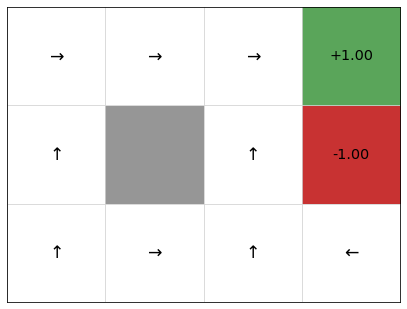

In [10]:
from gridworld import GridWorld
from qlearning import QLearning
from linear_qfunction import LinearQFunction
from epsilon_greedy import EpsilonGreedy
mdp = GridWorld(width = 4, height = 3)
features = GridWorldFeatureExtractor8(mdp,blocked_state)
qfunction = LinearQFunction(features)
QLearning(mdp, EpsilonGreedy(), qfunction).execute()
policy = qfunction.extract_policy(mdp)
#mdp.visualise_q_function(qfunction)
mdp.visualise_policy(policy)

In [11]:
from qfunction import QFunction
import math

class NonLinearQFunction2(QFunction):
    def __init__(self, features, default=0.0):
        self.features = features
        self.num_features = features.num_features()
        self.num_actions = features.num_actions()
        self.weights = [default] * (self.num_features * self.num_actions)

    def update(self, state, action, delta):
        # Update the weights
        feature_values = self.features.extract(state, action)
        q_value = self.get_q_value(state, action)
        tanh_squared = 1 - math.tanh(q_value)**2
        for i in range(len(self.weights)):
            self.weights[i] = self.weights[i] + (delta * feature_values[i] * tanh_squared)

    def get_q_value(self, state, action):
        q_value = 0.0
        feature_values = self.features.extract(state, action)
        for i in range(len(feature_values)):
            q_value += feature_values[i] * self.weights[i]
        
        # Applying hyperbolic tangent (tanh) nonlinearity to the Q-value
        return math.tanh(q_value)


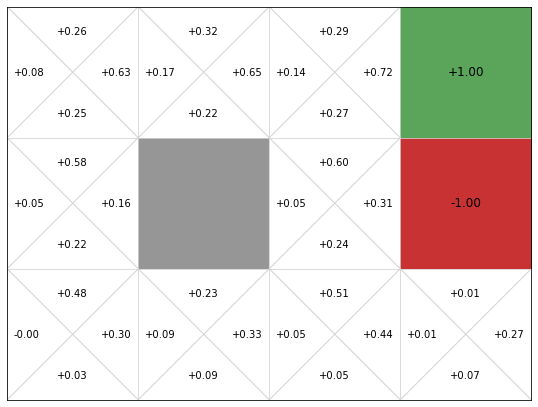

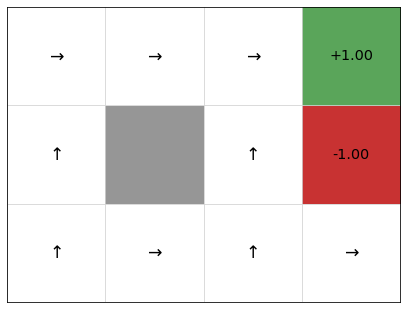

In [12]:
np.random.seed(111)
from gridworld import GridWorld
from qlearning import QLearning
#from linear_qfunction import LinearQFunction
from epsilon_greedy import EpsilonGreedy
mdp = GridWorld()
features = GridWorldFeatureExtractor8(mdp,blocked_state)
qfunction = NonLinearQFunction2(features)
QLearning(mdp, EpsilonGreedy(), qfunction).execute()
policy = qfunction.extract_policy(mdp)
mdp.visualise_q_function(qfunction)
mdp.visualise_policy(policy)

In [13]:
import random
from multi_armed_bandit import MultiArmedBandit


class EpsilonGreedy(MultiArmedBandit):
    def __init__(self, epsilon=0.1):
        self.epsilon = epsilon

    def reset(self):
        pass

    def select(self, state, actions, qfunction):
        # Select a random action with epsilon probability
        if random.random() < self.epsilon:
            return random.choice(actions)
        (arg_max_q, _) = qfunction.get_max_q(state, actions)
        return arg_max_q


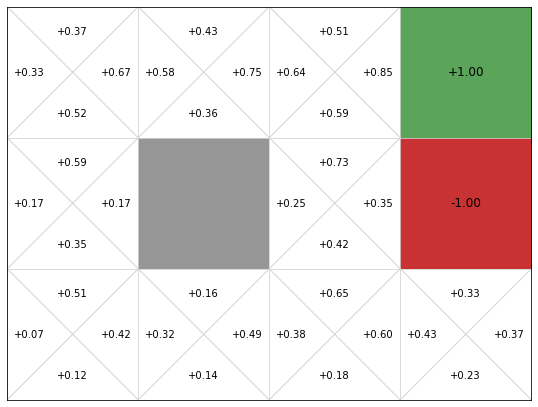

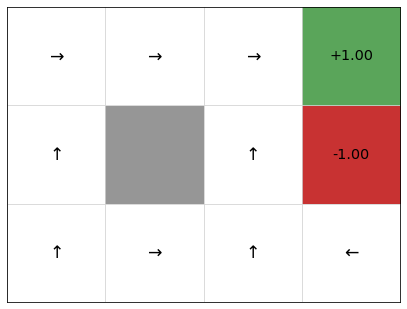

In [14]:
from gridworld import GridWorld
from qlearning import QLearning
from linear_qfunction import LinearQFunction
from epsilon_greedy import EpsilonGreedy
mdp = GridWorld(width = 4, height = 3)
features = GridWorldFeatureExtractor5(mdp,blocked_state)
qfunction = LinearQFunction(features)
QLearning(mdp, EpsilonGreedy(), qfunction).execute()
policy = qfunction.extract_policy(mdp)
mdp.visualise_q_function(qfunction)
mdp.visualise_policy(policy)

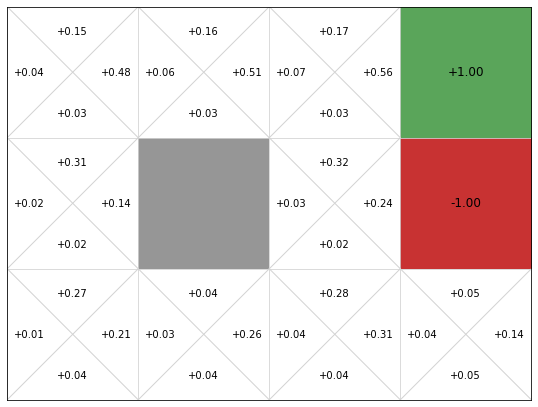

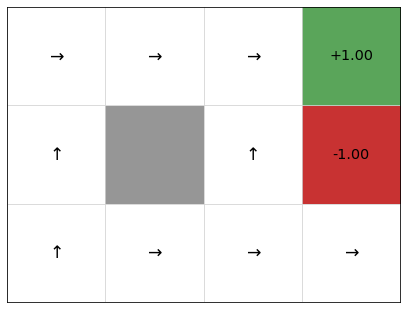

In [15]:
np.random.seed(198)
from gridworld import GridWorld
from qlearning import QLearning
#from linear_qfunction import LinearQFunction
from epsilon_greedy import EpsilonGreedy
mdp = GridWorld()
features = GridWorldFeatureExtractor5(mdp,blocked_state)
qfunction = NonLinearQFunction2(features)
QLearning(mdp, EpsilonGreedy(), qfunction).execute()
policy = qfunction.extract_policy(mdp)
mdp.visualise_q_function(qfunction)
mdp.visualise_policy(policy)

In [16]:
import random
from multi_armed_bandit import MultiArmedBandit
import numpy as np

class EpsilonGreedy1(MultiArmedBandit):
    def __init__(self, n_trials=10, success_prob=0.5):
        self.n_trials = n_trials
        self.success_prob = success_prob

    def reset(self):
        pass

    def select(self, state, actions, qfunction):
        # Use the binomial distribution for action selection
        binomial_samples = [np.random.binomial(self.n_trials, self.success_prob) for _ in actions]
        max_sample_index = np.argmax(binomial_samples)
        return actions[max_sample_index]

# List of actions
actions = ['up', 'down', 'left', 'right']

# Example usage
epsilon_greedy = EpsilonGreedy1(n_trials=10, success_prob=0.5)
selected_action = epsilon_greedy.select('example_state', actions, 'example_qfunction')
print("Selected action:", selected_action)


Selected action: down


In [17]:
import random
from multi_armed_bandit import MultiArmedBandit
import numpy as np

class EpsilonGreedy3(MultiArmedBandit):
    def __init__(self, lam=1.0):
        self.lam = lam

    def reset(self):
        pass

    def select(self, state, actions, qfunction):
        # Use the Poisson distribution for action selection
        poisson_samples = [np.random.poisson(self.lam) for _ in actions]
        max_sample_index = np.argmax(poisson_samples)
        return actions[max_sample_index]
# List of actions
actions = ['up', 'down', 'left', 'right']

# Example usage
epsilon_greedy = EpsilonGreedy3(lam=1.0)
selected_action = epsilon_greedy.select('example_state', actions, 'example_qfunction')
print("Selected action:", selected_action)

Selected action: down


# Define four features

In [27]:
from feature_extractor import FeatureExtractor
from gridworld import GridWorld
# Define the blocked state position as a tuple
blocked_state = (1, 1)

from feature_extractor import FeatureExtractor
from gridworld import GridWorld

class GridWorldFeatureExtractor4(FeatureExtractor):

    def __init__(self, mdp, blocked_state):
        self.mdp = mdp
        self.blocked_state = blocked_state  # Tuple representing the blocked state position

    def num_features(self):
        # Include an additional binary feature for each action
        return 4

    def num_actions(self):
        return len(self.mdp.get_actions())

    def is_forbidden_state(self, state):
        # Check if the state is the blocked state
        return state == self.blocked_state

    def extract(self, state, action):
        goal = (self.mdp.width - 1, self.mdp.height - 1)
        x = 0
        y = 1
        e = 0.01
        feature_values = []

        for a in self.mdp.get_actions():
            if a == action and state != GridWorld.TERMINAL:
                #Distance-based features
                feature_x = 1.0 - (abs(state[x] - goal[x]) / (goal[x]+e))
                feature_x = max(feature_x, 0.0)
                #feature_values += [feature_x]
                
                # Calculate a feature that increases as 'y' approaches the goal
                feature_y = 1.0 - (abs(state[y] - goal[y]) / (goal[y]+e))
                feature_y = max(feature_y, 0.0)
                #feature_values += [feature_y]
                # Calculate a feature that decreases as the state gets farther from the goal
                distance_to_goal = abs(state[x] - goal[x]) + abs(state[y] - goal[y])
                distance_feature = 1.0 / (distance_to_goal + e)
                feature_values += [distance_feature]
               
                # Feature indicating if the current state is close to the forbidden state
                distance_to_blocked_state = abs(state[x] - self.blocked_state[0]) + abs(state[y] - self.blocked_state[1])
                proximity_feature = distance_to_blocked_state / (self.mdp.width + self.mdp.height)
                feature_values += [proximity_feature]
                             
              
                feature_values +=[1 if state[x] <= self.mdp.width-1 and state[y]==0 and action !="DOWN" else 0]
                
                # Check whether resulting state is valid
                action_mapping = {
                    '▲': (0, 1),
                    '▼': (0, -1),
                    '◄': (-1, 0),
                    '►': (1, 0),
                    'terminate': (3, 2)
                }
                new_state = (state[0] + action_mapping[a][0], state[1] + action_mapping[a][1])
                is_valid = (new_state not in self.mdp.blocked_states) and (new_state in self.mdp.get_states()) and (new_state !=list(self.mdp.get_goal_states().keys())[1])
                feature_values += [1 if is_valid else 0]
            else:
                for _ in range(0, self.num_features()):
                    feature_values += [0.0]
        return feature_values

In [19]:
import numpy as np

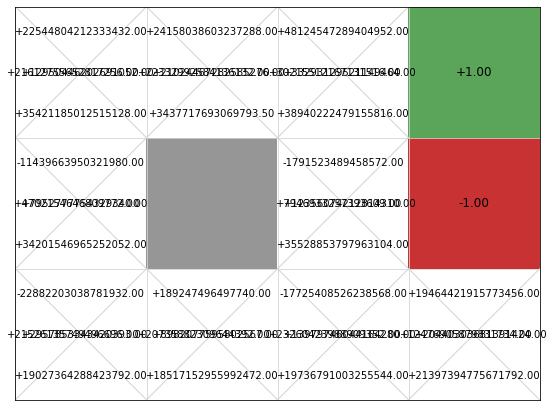

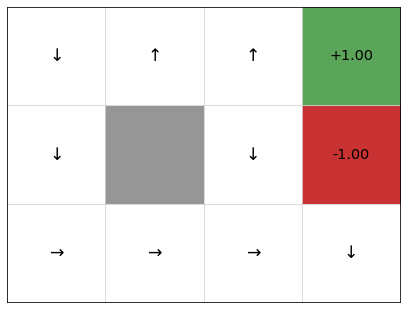

In [28]:
from gridworld import GridWorld
from qlearning import QLearning
from linear_qfunction import LinearQFunction
from epsilon_greedy import EpsilonGreedy
mdp = GridWorld(width = 4, height = 3)
features = GridWorldFeatureExtractor4(mdp,blocked_state)
qfunction = LinearQFunction(features)
QLearning(mdp, EpsilonGreedy(), qfunction).execute()
policy = qfunction.extract_policy(mdp)
mdp.visualise_q_function(qfunction)
mdp.visualise_policy(policy)

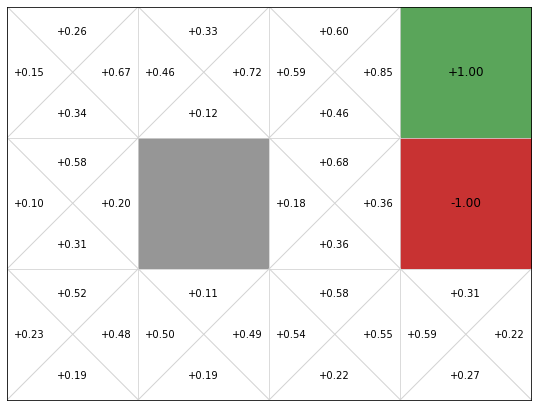

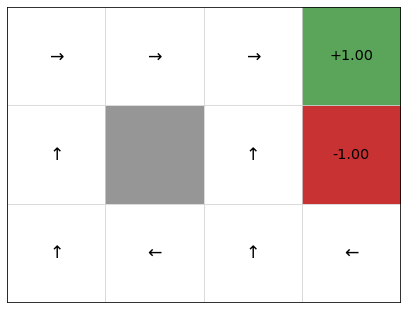

In [29]:
np.random.seed(198)
from gridworld import GridWorld
from qlearning import QLearning
#from linear_qfunction import LinearQFunction
from epsilon_greedy import EpsilonGreedy
mdp = GridWorld()
features = GridWorldFeatureExtractor4(mdp,blocked_state)
qfunction = NonLinearQFunction2(features)
QLearning(mdp, EpsilonGreedy(), qfunction).execute()
policy = qfunction.extract_policy(mdp)
mdp.visualise_q_function(qfunction)
mdp.visualise_policy(policy)

In [22]:
from feature_extractor import FeatureExtractor
from gridworld import GridWorld
# Define the blocked state position as a tuple
blocked_state = (1, 1)

from feature_extractor import FeatureExtractor
from gridworld import GridWorld

class GridWorldFeatureExtractor3(FeatureExtractor):

    def __init__(self, mdp, blocked_state):
        self.mdp = mdp
        self.blocked_state = blocked_state  # Tuple representing the blocked state position

    def num_features(self):
        # Include an additional binary feature for each action
        return 3

    def num_actions(self):
        return len(self.mdp.get_actions())

    def is_forbidden_state(self, state):
        # Check if the state is the blocked state
        return state == self.blocked_state

    def extract(self, state, action):
        goal = (self.mdp.width - 1, self.mdp.height - 1)
        x = 0
        y = 1
        e = 0.01
        feature_values = []

        for a in self.mdp.get_actions():
            if a == action and state != GridWorld.TERMINAL:
                #Distance-based features
                feature_x = 1.0 - (abs(state[x] - goal[x]) / (goal[x]+e))
                feature_x = max(feature_x, 0.0)
                #feature_values += [feature_x]
                
                # Calculate a feature that increases as 'y' approaches the goal
                feature_y = 1.0 - (abs(state[y] - goal[y]) / (goal[y]+e))
                feature_y = max(feature_y, 0.0)
                #feature_values += [feature_y]
                # Calculate a feature that decreases as the state gets farther from the goal
                distance_to_goal = abs(state[x] - goal[x]) + abs(state[y] - goal[y])
                distance_feature = 1.0 / (distance_to_goal + e)
                #feature_values += [distance_feature]
               
                # Feature indicating if the current state is close to the forbidden state
                distance_to_blocked_state = abs(state[x] - self.blocked_state[0]) + abs(state[y] - self.blocked_state[1])
                proximity_feature = distance_to_blocked_state / (self.mdp.width + self.mdp.height)
                feature_values += [proximity_feature+distance_feature]
                             
              
                feature_values +=[1 if state[x] <= self.mdp.width-1 and state[y]==0 and action !="DOWN" else 0]
                
                # Check whether resulting state is valid
                action_mapping = {
                    '▲': (0, 1),
                    '▼': (0, -1),
                    '◄': (-1, 0),
                    '►': (1, 0),
                    'terminate': (3, 2)
                }
                new_state = (state[0] + action_mapping[a][0], state[1] + action_mapping[a][1])
                is_valid = (new_state not in self.mdp.blocked_states) and (new_state in self.mdp.get_states()) and (new_state !=list(self.mdp.get_goal_states().keys())[1])
                feature_values += [1 if is_valid else 0]
            else:
                for _ in range(0, self.num_features()):
                    feature_values += [0.0]
        return feature_values

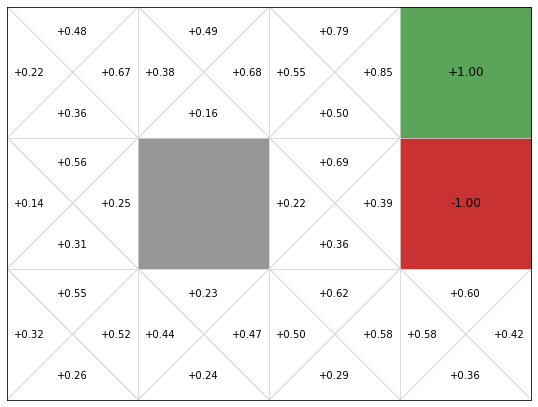

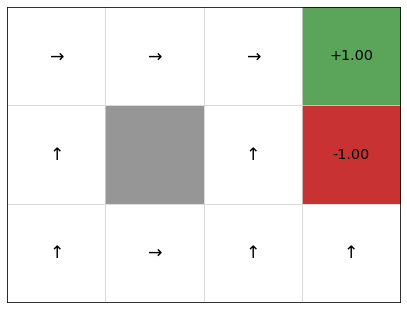

In [23]:
from gridworld import GridWorld
from qlearning import QLearning
#from linear_qfunction import LinearQFunction
from epsilon_greedy import EpsilonGreedy
mdp = GridWorld()
features = GridWorldFeatureExtractor3(mdp,blocked_state)
qfunction = NonLinearQFunction2(features)
QLearning(mdp, EpsilonGreedy(), qfunction).execute()
policy = qfunction.extract_policy(mdp)
mdp.visualise_q_function(qfunction)
mdp.visualise_policy(policy)

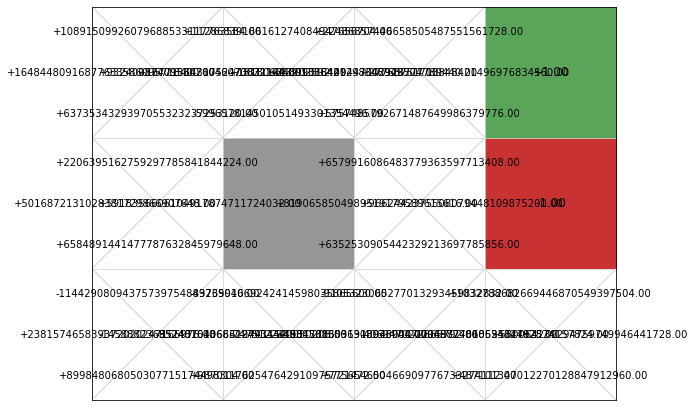

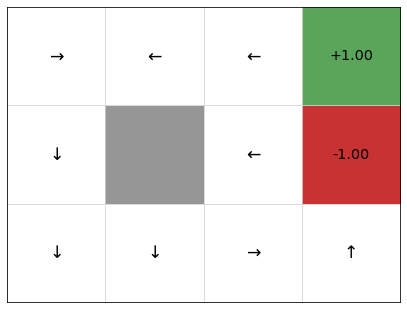

In [25]:
from gridworld import GridWorld
from qlearning import QLearning
from linear_qfunction import LinearQFunction
from epsilon_greedy import EpsilonGreedy
mdp = GridWorld(width = 4, height = 3)
features = GridWorldFeatureExtractor3(mdp,blocked_state)
qfunction = LinearQFunction(features)
QLearning(mdp, EpsilonGreedy(), qfunction).execute()
policy = qfunction.extract_policy(mdp)
mdp.visualise_q_function(qfunction)
mdp.visualise_policy(policy)